# GIC Analysis Basics

Calculating Geomagnetically Induced Currents (GIC) for a uniform electric field
and exploring the results.

Topics covered:
- Configuring uniform E-field storms
- Retrieving transformer GIC currents
- Visualizing GIC distribution
- Storm direction sensitivity

Import the case and instantiate the `GridWorkBench`.

```python
from esapp import GridWorkBench
from esapp.components import *

wb = GridWorkBench(case_path)
```

In [8]:
# This cell is hidden in the documentation.
from esapp import GridWorkBench
from esapp.components import *
import numpy as np
import matplotlib.pyplot as plt
import ast

with open('../data/case.txt', 'r') as f:
    case_path = ast.literal_eval(f.read().strip())

wb = GridWorkBench(case_path)

'open' took: 3.7557 sec


In [9]:
# Plotting functions (hidden from documentation)
import sys; sys.path.insert(0, "..")
from plot_helpers import plot_gic_distribution, plot_direction_sensitivity

## Calculate GIC Response

Compute geomagnetically induced currents for a uniform electric field. This calculates harmonic currents in transformers due to a 1.0 V/km electric field oriented at 90 degrees:

In [10]:
wb.calculate_gic(max_field=1.0, direction=90.0)

## Retrieve GIC Results

Extract GIC neutral currents from the transformers to identify which components experience the largest impacts:

In [11]:
gics = wb[GICXFormer, ['BusNum3W', 'BusNum3W:1', 'GICXFNeutralAmps']]
gics.head()

,BusNum3W,BusNum3W:1,BusNum3W:2,BusNum3W:5,GICXFNeutralAmps,LineCircuit
0,1,2,0,2,0.753270,1
1,1,2,0,2,0.753270,2
2,1,2,0,2,0.753270,3
3,5,6,0,6,13.443257,1
4,9,10,0,10,15.439837,1


In [12]:
max_gic = gics['GICXFNeutralAmps'].abs().max()
print(f"Maximum |GIC|: {max_gic:.3f} Amps")

Maximum |GIC|: 15.440 Amps


### GIC Distribution

Visualize the distribution of GIC magnitudes across all transformers.

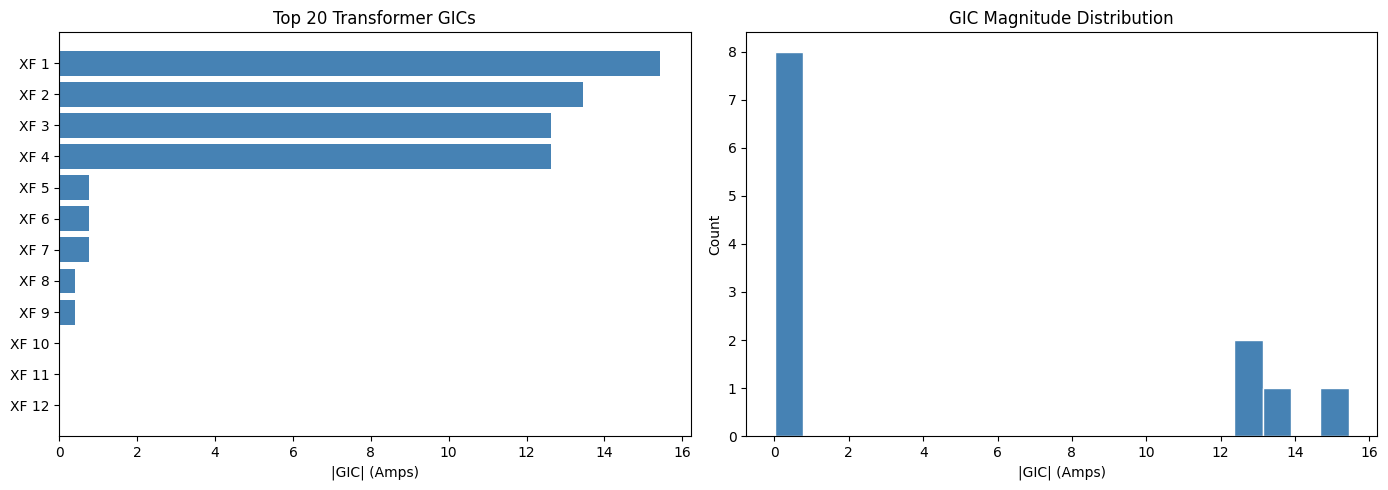

In [13]:
gic_abs = gics['GICXFNeutralAmps'].abs().sort_values(ascending=False)
plot_gic_distribution(gic_abs)

## Storm Direction Sensitivity

Sweep the E-field direction to find which orientation produces the worst-case GIC.

In [14]:
directions = np.arange(0, 361, 10)
max_gics = []

for d in directions:
    wb.calculate_gic(max_field=1.0, direction=d)
    gic_vals = wb[GICXFormer, 'GICXFNeutralAmps']['GICXFNeutralAmps']
    max_gics.append(gic_vals.abs().max())

max_gics = np.array(max_gics)

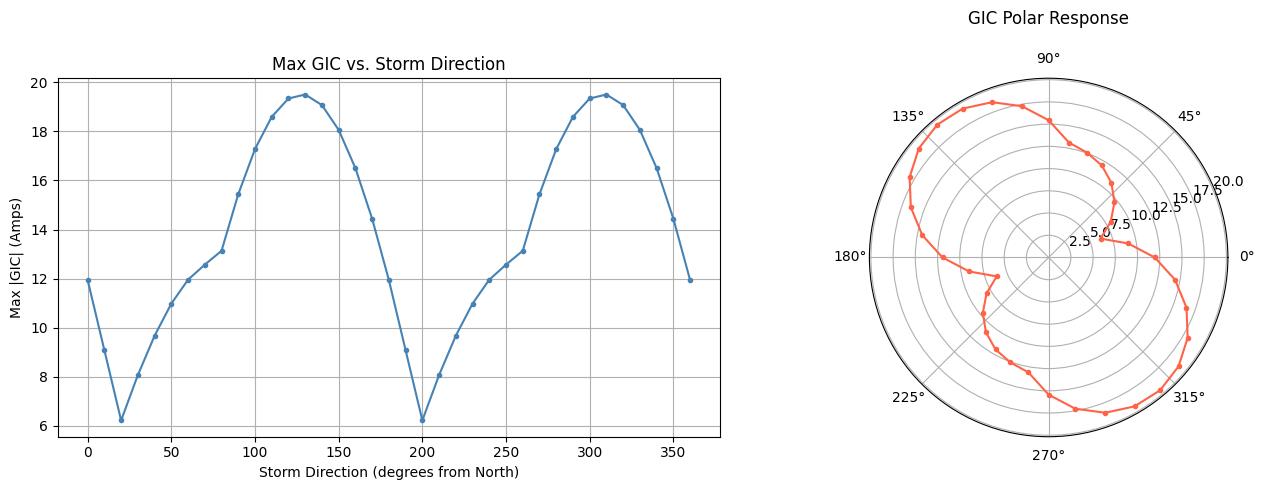

Worst-case direction: 130 degrees
Worst-case max GIC: 19.50 Amps


In [15]:
plot_direction_sensitivity(directions, max_gics)